## Data Understanding
***
The dataset originally comes from Kermany et al. on [Mendeley](https://data.mendeley.com/datasets/rscbjbr9sj/3). I downloaded the data from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) as it had already separated out the chest x-ray images from other data in the original dataset.

The following description is taken directly from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia):
>The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
>
>Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
>
>For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.


Kermany D, Goldbaum M, Cai W et al. Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell. 2018; 172(5):1122-1131. doi:10.1016/j.cell.2018.02.010.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
normal = mpimg.imread('../data/chest_xray/new_train/NORMAL/IM-0001-0001.jpeg')
pneumonia = mpimg.imread('../data/chest_xray/new_train/PNEUMONIA/person1_bacteria_1.jpeg')

# Display the image
fig, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].axis('off')
ax[0].imshow(normal,cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Normal")
ax[1].axis('off')
ax[1].imshow(pneumonia,cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Pneumonia")
plt.show()

In [ ]:
import os
# making the paths to the datasets
train_normal = "../data/chest_xray/train/NORMAL"
train_pneumonia = "../data/chest_xray/train/PNEUMONIA"

test_normal = "../data/chest_xray/test/NORMAL"
test_pneumonia = "../data/chest_xray/test/PNEUMONIA"

val_normal = "../data/chest_xray/val/NORMAL"
val_pneumonia = "../data/chest_xray/val/PNEUMONIA"

#Looking at the distribution of training, testing, and validation sets. 
print('There are', len(os.listdir(train_normal)), 'normal images in the training set')
print('There are', len(os.listdir(train_pneumonia)), 'pnemonia images in the training set')
print('Making a total of', len(os.listdir(train_normal))+len(os.listdir(train_pneumonia)), 'in the training set')
print('There are', len(os.listdir(test_normal)), 'normal images in the testing set')
print('There are', len(os.listdir(test_pneumonia)), 'pnemonia images in the testing set')
print('Making a total of', len(os.listdir(test_normal))+len(os.listdir(test_pneumonia)), 'in the testing set')
print('There are', len(os.listdir(val_normal)), 'normal images in the validation set')
print('There are', len(os.listdir(val_pneumonia)), 'pnemonia images in the validation set')
print('Making a total of', len(os.listdir(val_normal))+len(os.listdir(val_pneumonia)), 'in the validation set')

In [4]:
import pandas as pd
import os
data_dir = "../data/chest_xray"
def count_images(directory):
    normal_count = len(os.listdir(os.path.join(directory, 'NORMAL')))
    pneumonia_count = len(os.listdir(os.path.join(directory, 'PNEUMONIA')))
    return normal_count, pneumonia_count

data = {
    'Dataset': ['train', 'val', 'test'],
    'Normal': [],
    'Pneumonia': [],
    'Total': []
}

for dataset in data['Dataset']:
    normal, pneumonia = count_images(data_dir+'/'+dataset)
    data['Normal'].append(normal)
    data['Pneumonia'].append(pneumonia)
    data['Total'].append(normal + pneumonia)

df = pd.DataFrame(data)
df


,Dataset,Normal,Pneumonia,Total
0,train,1341,3875,5216
1,val,8,8,16
2,test,234,390,624


<Axes: xlabel='Dataset'>

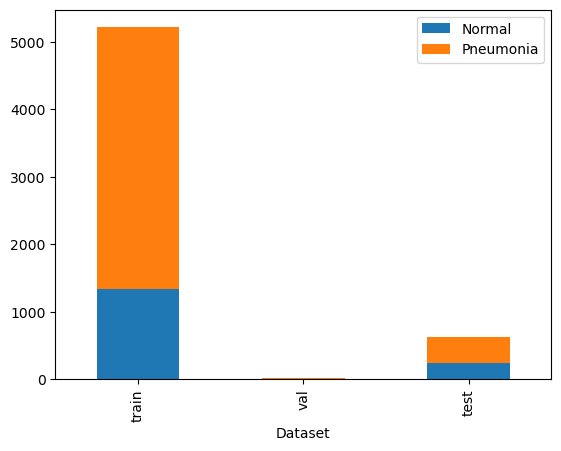

In [5]:
# For a simple bar chart using pandas
df.plot(kind='bar', x='Dataset', y=['Normal', 'Pneumonia'], stacked=True)


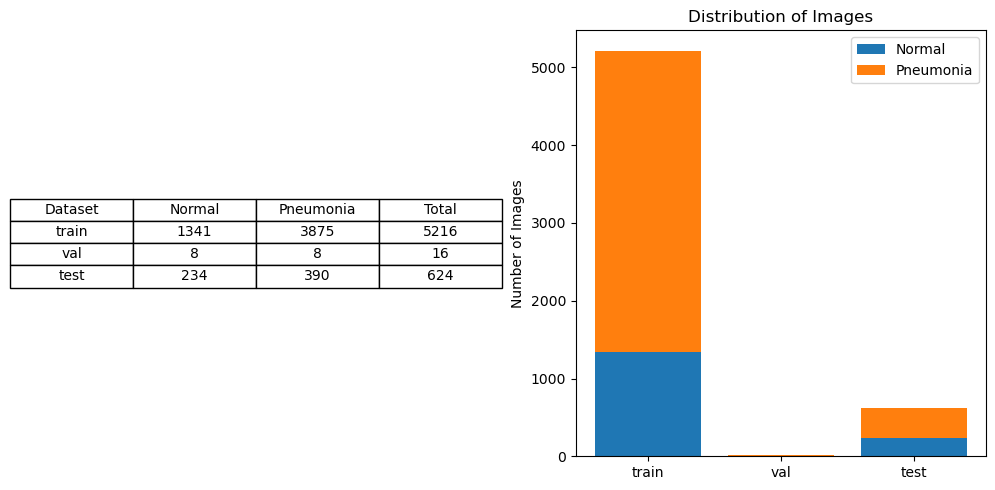

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the DataFrame as a table on the left
# Note: bbox=[left, bottom, width, height] in figure coordinates (0 to 1)
the_table = axs[0].table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.2)
axs[0].axis('off')

# Plot a bar chart on the right
axs[1].bar(df['Dataset'], df['Normal'], label='Normal')
axs[1].bar(df['Dataset'], df['Pneumonia'], bottom=df['Normal'], label='Pneumonia')
axs[1].set_ylabel('Number of Images')
axs[1].set_title('Distribution of Images')
axs[1].legend()

# Adjust layout
plt.tight_layout()

plt.show()


In [ ]:
# show distribution of images in directories for future comparison
# Maybe make a visual showing the original distribution (Positive vs. Negative) of images
# Training: 3875 to 1341, ratio: 74-26
# Validation: 8 to 8, ratio: 50-50
# Testing: 390 to 234, ratio: 63-38
# Train-Val-Test ratio total:5216-16-624  percent: 89.07-0.27-10.66